<a href="https://colab.research.google.com/github/viriyaputra/skripsi/blob/main/Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
!pip install transformers
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=8253b70b8b3af52451caa751787fae2fb85dd1feccd5ba69fe9bbcb33fef405e
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
import pandas as pd
#library that contains punctuation
import string
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import transformers
import torch
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from transformers import BertTokenizer, AutoModel
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = AutoModel.from_pretrained("indobenchmark/indobert-base-p1")

# Pre-Processing

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Skripsi/CombinedDataset.csv')
df

,Label,Body
0,1,"Jakarta, CNN Indonesia -- Satu orang dikonfirm..."
1,1,"Jakarta, CNN Indonesia -- Partai Keadilan Seja..."
2,1,"Jakarta, CNN Indonesia -- Real Madrid berhasil..."
3,1,"Surabaya, CNN Indonesia -- Venna Melinda memba..."
4,1,"Jakarta, CNN Indonesia -- Toyota mengungkap wa..."
...,...,...
5871,0,HOAX: Vaksin kanker serviks pada anak-anak SD ...
5872,0,Sebuah akun Twitter dengan nama akun @gerilyap...
5873,0,Sebuah akun Facebook memposting video yang dia...
5874,0,Sebuah akun Facebook memposting status yang me...


Pre-processing

In [ ]:
#checking the count of the dependent variable
df['Label'].value_counts()

0    3843
1    2033
Name: Label, dtype: int64

In [ ]:
df.dtypes

Label     int64
Body     object
dtype: object

In [ ]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Lowercase all characters
    text = text.lower()

    return text

df['cleaned_text'] = df['Body'].apply(str).apply(clean_text)
print(df)

      Label                                               Body  \
0         1  Jakarta, CNN Indonesia -- Satu orang dikonfirm...   
1         1  Jakarta, CNN Indonesia -- Partai Keadilan Seja...   
2         1  Jakarta, CNN Indonesia -- Real Madrid berhasil...   
3         1  Surabaya, CNN Indonesia -- Venna Melinda memba...   
4         1  Jakarta, CNN Indonesia -- Toyota mengungkap wa...   
...     ...                                                ...   
5871      0  HOAX: Vaksin kanker serviks pada anak-anak SD ...   
5872      0  Sebuah akun Twitter dengan nama akun @gerilyap...   
5873      0  Sebuah akun Facebook memposting video yang dia...   
5874      0  Sebuah akun Facebook memposting status yang me...   
5875      0  Muncul postingan hoax di Instagram dan Twitter...   

                                           cleaned_text  
0     jakarta cnn indonesia satu orang dikonfirmasi ...  
1     jakarta cnn indonesia partai keadilan sejahter...  
2     jakarta cnn indonesia real 

In [ ]:
stop_words = set(stopwords.words('indonesian'))

def remove_stop_words(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

In [ ]:
df['final_text'] = df['cleaned_text'].apply(remove_stop_words)
print(df)

      Label                                               Body  \
0         1  Jakarta, CNN Indonesia -- Satu orang dikonfirm...   
1         1  Jakarta, CNN Indonesia -- Partai Keadilan Seja...   
2         1  Jakarta, CNN Indonesia -- Real Madrid berhasil...   
3         1  Surabaya, CNN Indonesia -- Venna Melinda memba...   
4         1  Jakarta, CNN Indonesia -- Toyota mengungkap wa...   
...     ...                                                ...   
5871      0  HOAX: Vaksin kanker serviks pada anak-anak SD ...   
5872      0  Sebuah akun Twitter dengan nama akun @gerilyap...   
5873      0  Sebuah akun Facebook memposting video yang dia...   
5874      0  Sebuah akun Facebook memposting status yang me...   
5875      0  Muncul postingan hoax di Instagram dan Twitter...   

                                           cleaned_text  \
0     jakarta cnn indonesia satu orang dikonfirmasi ...   
1     jakarta cnn indonesia partai keadilan sejahter...   
2     jakarta cnn indonesia re

In [ ]:
df

,Label,Body,cleaned_text,final_text
0,1,"Jakarta, CNN Indonesia -- Satu orang dikonfirm...",jakarta cnn indonesia satu orang dikonfirmasi ...,jakarta cnn indonesia orang dikonfirmasi menin...
1,1,"Jakarta, CNN Indonesia -- Partai Keadilan Seja...",jakarta cnn indonesia partai keadilan sejahter...,jakarta cnn indonesia partai keadilan sejahter...
2,1,"Jakarta, CNN Indonesia -- Real Madrid berhasil...",jakarta cnn indonesia real madrid berhasil lol...,jakarta cnn indonesia real madrid berhasil lol...
3,1,"Surabaya, CNN Indonesia -- Venna Melinda memba...",surabaya cnn indonesia venna melinda membacaka...,surabaya cnn indonesia venna melinda membacaka...
4,1,"Jakarta, CNN Indonesia -- Toyota mengungkap wa...",jakarta cnn indonesia toyota mengungkap wacana...,jakarta cnn indonesia toyota mengungkap wacana...
...,...,...,...,...
5871,0,HOAX: Vaksin kanker serviks pada anak-anak SD ...,hoax vaksin kanker serviks pada anak anak sd a...,hoax vaksin kanker serviks anak anak sd menyeb...
5872,0,Sebuah akun Twitter dengan nama akun @gerilyap...,sebuah akun twitter dengan nama akun gerilyapo...,akun twitter nama akun gerilyapolitik memposti...
5873,0,Sebuah akun Facebook memposting video yang dia...,sebuah akun facebook memposting video yang dia...,akun facebook memposting video simulasi hackin...
5874,0,Sebuah akun Facebook memposting status yang me...,sebuah akun facebook memposting status yang me...,akun facebook memposting status mengklaim webs...


Splitting Dataset

In [ ]:
df_train, df_valid = train_test_split(
df, test_size=0.2, random_state=42)

df_train = df_train.reset_index(drop=True)

df_valid = df_valid.reset_index(drop=True)

In [ ]:
df_train['Label'].value_counts()

0    3102
1    1598
Name: Label, dtype: int64

In [ ]:
df_valid['Label'].value_counts()

0    741
1    435
Name: Label, dtype: int64

In [ ]:
df_train

,Label,Body,cleaned_text,final_text
0,0,Hasil periksa fakta Vendra Panji\n\n\n\nNarasi...,hasil periksa fakta vendra panji narasi yang d...,hasil periksa fakta vendra panji narasi unggah...
1,0,Hasil Periksa Fakta Novita Kusuma Wardhani. In...,hasil periksa fakta novita kusuma wardhani inf...,hasil periksa fakta novita kusuma wardhani inf...
2,1,“Gila kalau ada yang percaya berita tak benar ...,gila kalau ada yang percaya berita tak benar i...,gila percaya berita djarot kampanye hitam meni...
3,0,Hasil periksa fakta Ari Dwi Prasetyo.\n\n\n\nI...,hasil periksa fakta ari dwi prasetyo informasi...,hasil periksa fakta ari dwi prasetyo informasi...
4,1,Humas Polda Jatim Frans Barung Mangenan mengat...,humas polda jatim frans barung mangenan mengat...,humas polda jatim frans barung mangenan kabar ...
...,...,...,...,...
4695,0,Hasil Periksa Fakta Khairunnisa A.\n\n\n\nBuka...,hasil periksa fakta khairunnisa a bukan video ...,hasil periksa fakta khairunnisa a video bender...
4696,1,Foto : Twitter @jbillinson Debunk ini berisi b...,foto twitter jbillinson debunk ini berisi bant...,foto twitter jbillinson debunk berisi bantahan...
4697,0,"Ilustrasi Asam Urat Belakangan ini, Hoax menge...",ilustrasi asam urat belakangan ini hoax mengen...,ilustrasi asam urat hoax tema kesehatan gencar...
4698,0,Sumber: Media Sosial (https://www.facebook.com...,sumber media sosial narasi foto veteran ini me...,sumber media sosial narasi foto veteran foto v...


# Feature Extraction


Tokenization Indobert

In [ ]:
transformer_model = 'indobenchmark/indobert-base-p1'

In [ ]:
sentence_embedder = SentenceTransformer(transformer_model)

In [ ]:
embeddings_train = sentence_embedder.encode(df_train["final_text"])
embeddings_valid = sentence_embedder.encode(df_valid["final_text"])

# LSTM Classifier

In [ ]:
labels_train = np.array(df_train["Label"])
sentence_embeddings_train_lstm = np.array(embeddings_train)

labels_valid = np.array(df_valid["Label"])
sentence_embeddings_valid_lstm = np.array(embeddings_valid)

In [ ]:
# Create an LSTM classifier
model_lstm = Sequential()
model_lstm.add(LSTM(units=128, input_shape=(1, sentence_embeddings_train_lstm.shape[1]), return_sequences=False))
model_lstm.add(Dropout(rate=0.3))
model_lstm.add(Dense(units=1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])

In [ ]:
# Reshape the sentence embeddings for input to the LSTM
sentence_embeddings_train_lstm = sentence_embeddings_train_lstm.reshape(sentence_embeddings_train_lstm.shape[0], 1, sentence_embeddings_train_lstm.shape[1])
sentence_embeddings_valid_lstm = sentence_embeddings_valid_lstm.reshape(sentence_embeddings_valid_lstm.shape[0], 1, sentence_embeddings_valid_lstm.shape[1])

In [ ]:
# Train the LSTM classifier
history_lstm = model_lstm.fit(sentence_embeddings_train_lstm, labels_train, epochs=100, batch_size=16, validation_data=(sentence_embeddings_valid_lstm, labels_valid))

Epoch 1/100
294/294 [==============================] - 7s 8ms/step - loss: 0.5989 - accuracy: 0.6857 - val_loss: 0.5644 - val_accuracy: 0.6624
Epoch 2/100
294/294 [==============================] - 2s 6ms/step - loss: 0.5092 - accuracy: 0.7470 - val_loss: 0.4834 - val_accuracy: 0.7789
Epoch 3/100
294/294 [==============================] - 2s 6ms/step - loss: 0.4316 - accuracy: 0.8315 - val_loss: 0.4120 - val_accuracy: 0.8444
Epoch 4/100
294/294 [==============================] - 1s 5ms/step - loss: 0.3696 - accuracy: 0.8736 - val_loss: 0.3592 - val_accuracy: 0.8699
Epoch 5/100
294/294 [==============================] - 2s 6ms/step - loss: 0.3261 - accuracy: 0.8932 - val_loss: 0.3244 - val_accuracy: 0.8767
Epoch 6/100
294/294 [==============================] - 1s 5ms/step - loss: 0.2957 - accuracy: 0.9009 - val_loss: 0.2990 - val_accuracy: 0.8895
Epoch 7/100
294/294 [==============================] - 2s 6ms/step - loss: 0.2741 - accuracy: 0.9026 - val_loss: 0.2831 - val_accuracy: 0.8878

In [ ]:
predictions_lstm = model_lstm.predict(sentence_embeddings_valid_lstm)
predicted_labels_lstm = np.round(predictions_lstm).tolist()

37/37 [==============================] - 1s 3ms/step


In [ ]:
# Compute precision, recall, and F1-score
precision_lstm, recall_lstm, f1_score_lstm, _ = precision_recall_fscore_support(labels_valid, predicted_labels_lstm)

print('precision: {}'.format(precision_lstm))
print('recall: {}'.format(recall_lstm))
print('f1score: {}'.format(f1_score_lstm))


precision: [0.94362416 0.91183295]
recall: [0.94871795 0.90344828]
f1score: [0.9461642  0.90762125]


In [ ]:
# Evaluate the model on the test data
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(sentence_embeddings_valid_lstm, labels_valid)
print("Test Loss: ", test_loss_lstm)
print("Test Accuracy: ", test_acc_lstm)

37/37 [==============================] - 0s 4ms/step - loss: 0.1774 - accuracy: 0.9320
Test Loss:  0.1774313598871231
Test Accuracy:  0.9319728016853333


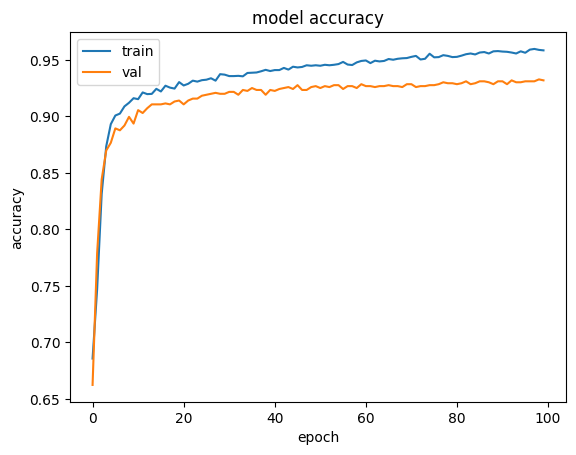

In [ ]:
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

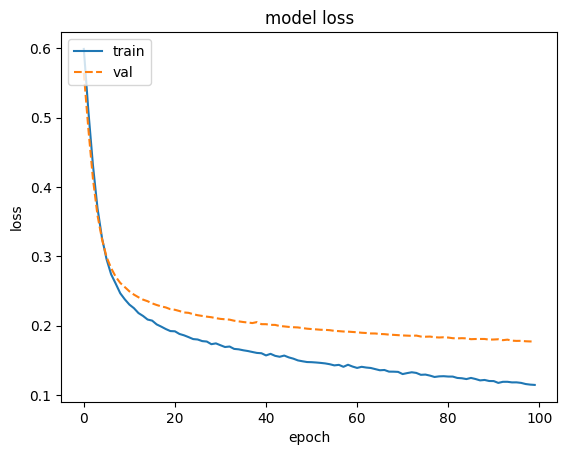

In [ ]:
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'], linestyle='dashed')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
confusion_matrix_lstm = metrics.confusion_matrix(labels_valid, predicted_labels_lstm)
cm_display_lstm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lstm, display_labels = [False, True])

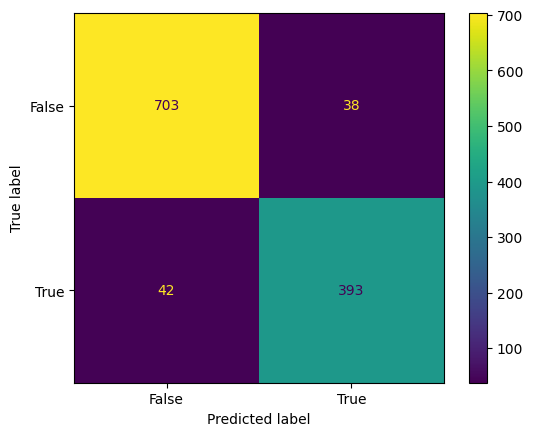

In [ ]:
cm_display_lstm.plot()
plt.show()

# Bi-LSTM Classifier


In [ ]:
labels_train = np.array(df_train["Label"])
sentence_embeddings_train_bilstm = np.array(embeddings_train)

labels_valid = np.array(df_valid["Label"])
sentence_embeddings_valid_bilstm = np.array(embeddings_valid)

In [ ]:
# Create an Bi-LSTM classifier
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(units=128, input_shape=(1, sentence_embeddings_train_bilstm.shape[1]), return_sequences=False)))
model_bilstm.add(Dropout(rate=0.3))
model_bilstm.add(Dense(units=1, activation='sigmoid'))
model_bilstm.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])

In [ ]:
# Reshape the sentence embeddings for input to the Bi-LSTM
sentence_embeddings_train_bilstm = sentence_embeddings_train_bilstm.reshape(sentence_embeddings_train_bilstm.shape[0], 1, sentence_embeddings_train_bilstm.shape[1])
sentence_embeddings_valid_bilstm = sentence_embeddings_valid_bilstm.reshape(sentence_embeddings_valid_bilstm.shape[0], 1, sentence_embeddings_valid_bilstm.shape[1])

In [ ]:
# Train the Bi-LSTM classifier
history_bilstm = model_bilstm.fit(sentence_embeddings_train_bilstm, labels_train, epochs=100, batch_size=16, validation_data=(sentence_embeddings_valid_bilstm, labels_valid))

# Train the Bi-LSTM classifier
history_lstm = model_lstm.fit(sentence_embeddings_train_lstm, labels_train, epochs=100, batch_size=16, validation_data=(sentence_embeddings_valid_lstm, labels_valid))

Epoch 1/100
294/294 [==============================] - 7s 9ms/step - loss: 0.5810 - accuracy: 0.6849 - val_loss: 0.5385 - val_accuracy: 0.6769
Epoch 2/100
294/294 [==============================] - 2s 6ms/step - loss: 0.4743 - accuracy: 0.7789 - val_loss: 0.4429 - val_accuracy: 0.7968
Epoch 3/100
294/294 [==============================] - 2s 8ms/step - loss: 0.3878 - accuracy: 0.8555 - val_loss: 0.3682 - val_accuracy: 0.8724
Epoch 4/100
294/294 [==============================] - 3s 9ms/step - loss: 0.3262 - accuracy: 0.8891 - val_loss: 0.3216 - val_accuracy: 0.8869
Epoch 5/100
294/294 [==============================] - 2s 8ms/step - loss: 0.2896 - accuracy: 0.9047 - val_loss: 0.2933 - val_accuracy: 0.8878
Epoch 6/100
294/294 [==============================] - 2s 6ms/step - loss: 0.2642 - accuracy: 0.9074 - val_loss: 0.2764 - val_accuracy: 0.8929
Epoch 7/100
294/294 [==============================] - 2s 6ms/step - loss: 0.2467 - accuracy: 0.9115 - val_loss: 0.2629 - val_accuracy: 0.8963

In [ ]:
predictions_bilstm = model_bilstm.predict(sentence_embeddings_valid_bilstm)
predicted_labels_bilstm = np.round(predictions_bilstm).tolist()

37/37 [==============================] - 1s 4ms/step


In [ ]:
# Compute precision, recall, and F1-score
precision_bilstm, recall_bilstm, f1_score_bilstm, _ = precision_recall_fscore_support(labels_valid, predicted_labels_bilstm)

print('precision: {}'.format(precision_bilstm))
print('recall: {}'.format(recall_bilstm))
print('f1score: {}'.format(f1_score_bilstm))

precision: [0.9498645 0.9086758]
recall: [0.94601889 0.91494253]
f1score: [0.9479378 0.9117984]


In [ ]:
# Evaluate the model on the test data
test_loss_bilstm, test_acc_bilstm = model_bilstm.evaluate(sentence_embeddings_valid_bilstm, labels_valid)
print("Test Loss: ", test_loss_bilstm)
print("Test Accuracy: ", test_acc_bilstm)

37/37 [==============================] - 0s 6ms/step - loss: 0.1723 - accuracy: 0.9345
Test Loss:  0.17233321070671082
Test Accuracy:  0.9345238208770752


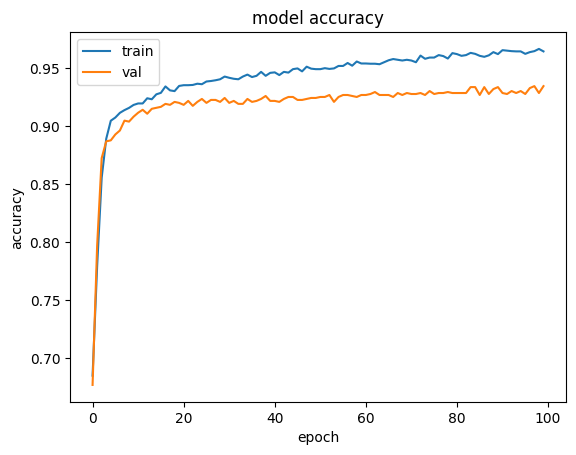

In [ ]:
plt.plot(history_bilstm.history['accuracy'])
plt.plot(history_bilstm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

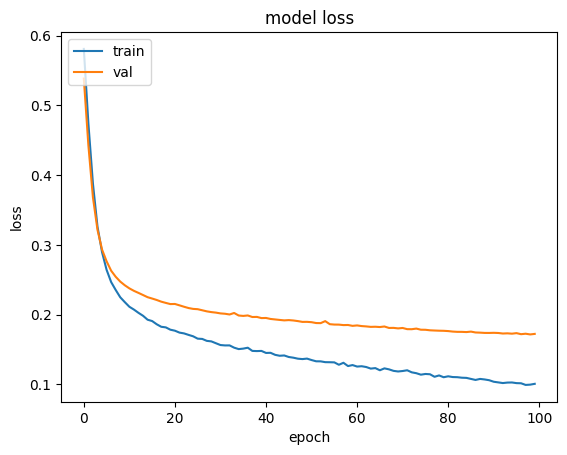

In [ ]:
plt.plot(history_bilstm.history['loss'])
plt.plot(history_bilstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
confusion_matrix_bilstm = metrics.confusion_matrix(labels_valid, predicted_labels_bilstm)
cm_display_bilstm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_bilstm, display_labels = [False, True])

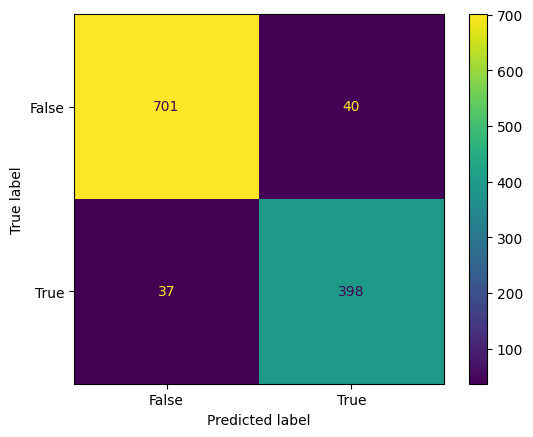

In [ ]:
cm_display_bilstm.plot()
plt.show()